# Test GPU (Optional)
Before Starting, kindly check the available GPU from the local host, GPU model and other related information. It might help!

In [1]:
import torch
print("Is CUDA enabled GPU Available?", torch.cuda.is_available())
print("GPU Number:", torch.cuda.device_count())
print("Current GPU Index:", torch.cuda.current_device())
print("GPU Type:", torch.cuda.get_device_name(device=None))
print("GPU Capability:", torch.cuda.get_device_capability(device=None))
print("Is GPU Initialized yet?", torch.cuda.is_initialized())

Is CUDA enabled GPU Available? False
GPU Number: 0


AssertionError: Torch not compiled with CUDA enabled

### Importing the Neccesary Libraries

In [2]:
# supresses future warnings 
import warnings                                                 
warnings.simplefilter(action='ignore')

# Import the pandas library for df creation
import pandas as pd

# Import the NumPy library to use the random package
import numpy as np
import math

# Import the matplotlib library for plotting
import matplotlib.pyplot as plt

# set plot style
plt.style.use('seaborn-whitegrid')

# Use the magic function to ensure plots render in a notebook
%matplotlib inline

# Import the seaborn library for plotting
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from statsmodels.regression import linear_model
from sklearn.metrics import confusion_matrix, classification_report, auc, precision_recall_curve, average_precision_score
from sklearn.metrics import mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score, roc_curve, plot_roc_curve
sns.set_theme(style="whitegrid")
from sklearn.metrics import classification_report 

## Data Preprocessing

In [3]:
Train = pd.read_csv(r'TrainingMain.csv')
Test= pd.read_csv(r'testing-set.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'TrainingMain.csv'

In [4]:
Train

,dur,proto,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,2,0,496,0,90909.090200,254,0,1.803636e+08,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,udp,2,0,1762,0,125000.000300,254,0,8.810000e+08,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,udp,2,0,1068,0,200000.005100,254,0,8.544000e+08,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,udp,2,0,900,0,166666.660800,254,0,6.000000e+08,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,udp,2,0,2126,0,100000.002500,254,0,8.504000e+08,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,0.000005,udp,2,0,104,0,200000.005100,254,0,8.320000e+07,...,1,2,0,0,0,2,1,0,Normal,0
82328,1.106101,tcp,20,8,18062,354,24.410067,254,252,1.241044e+05,...,1,1,0,0,0,3,2,0,Normal,0
82329,0.000000,arp,1,0,46,0,0.000000,0,0,0.000000e+00,...,1,1,0,0,0,1,1,1,Normal,0
82330,0.000000,arp,1,0,46,0,0.000000,0,0,0.000000e+00,...,1,1,0,0,0,1,1,1,Normal,0


In [5]:
Test

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175337,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


<AxesSubplot:>

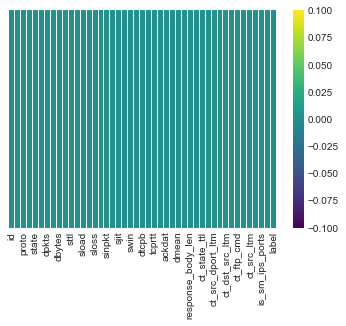

In [5]:
# Checking the Missing Values
sns.heatmap(Test.isnull(), yticklabels=False, cmap= "viridis")

<AxesSubplot:>

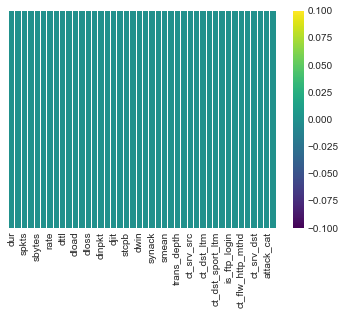

In [6]:
# Checking the Missing Values
sns.heatmap(Train.isnull(), yticklabels=False, cmap= "viridis")

In [44]:
print(f'Total NULL values in the Original training DataFrame = {Train.isnull().sum().sum()}')
print(Train.isnull().sum())

Total NULL values in the Original training DataFrame = 0
dur                  0
proto                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat           0


In [45]:
print(f'Total NULL values in the Original testing DataFrame = {Test.isnull().sum().sum()}')
print(Test.isnull().sum())

Total NULL values in the Original testing DataFrame = 0
dur                  0
proto                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat           0
l

In [5]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dur                82332 non-null  float64
 1   proto              82332 non-null  object 
 2   spkts              82332 non-null  int64  
 3   dpkts              82332 non-null  int64  
 4   sbytes             82332 non-null  int64  
 5   dbytes             82332 non-null  int64  
 6   rate               82332 non-null  float64
 7   sttl               82332 non-null  int64  
 8   dttl               82332 non-null  int64  
 9   sload              82332 non-null  float64
 10  dload              82332 non-null  float64
 11  sloss              82332 non-null  int64  
 12  dloss              82332 non-null  int64  
 13  sinpkt             82332 non-null  float64
 14  dinpkt             82332 non-null  float64
 15  sjit               82332 non-null  float64
 16  djit               823

In [6]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [6]:
Train['attack_cat'].unique()

array(['Normal', 'Reconnaissance', 'Backdoor', 'DoS', 'Exploits',
       'Analysis', 'Fuzzers', 'Worms', 'Shellcode', 'Generic'],
      dtype=object)

In [7]:
dummies = pd.get_dummies(Train['attack_cat'])
test_dummies = pd.get_dummies(Test['attack_cat'])
### adding the Dos and normal attacks as separate colummns in original dataframes
Train["DoS"] = dummies['DoS']
Test["DoS"] = test_dummies['DoS']
Train["Normal"] = dummies['Normal']
Test["Normal"] = test_dummies['Normal']

In [8]:
## Converting Categorical Varaibles into Numerical Varaibles 
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
Train["attack_cat"] = lb_make.fit_transform(Train["attack_cat"])
Train["proto"] = lb_make.fit_transform(Train["proto"])
Test["attack_cat"] = lb_make.fit_transform(Test["attack_cat"])
Test["proto"] = lb_make.fit_transform(Test["proto"])

In [9]:
#removing irrelevant and extra column's from testing data
Test.drop(['service','state','id'],axis=1,inplace=True)

In [10]:
# split into train and test sets
train_size = int(len(Test) * 0.99)
test_size =  train_size - len(Test)
train = Train[test_size:len(Train)]
test = Test[train_size:len(Test)]
print(len(train),len(test))

1754 1754


In [11]:
## making the training data out of orignial dataframe


training_set = train.iloc[:].values
X_train = []
y_train = []
for i in range(100, training_set.shape[0]):
    X_train.append(training_set[i-100:i,0])
    y_train.append(training_set[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [12]:
## making the testing data out of orignial dataframe


testing_set = test.iloc[:].values
X_test = []
y_test = []
for i in range(100, testing_set.shape[0]):
    X_test.append(testing_set[i-100:i,0])
    y_test.append(testing_set[i,0])
X_test, y_test = np.array(X_test), np.array(y_test)

In [13]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (1654, 100)
X_test shape: (1654, 100)
y_train shape: (1654,)
y_test shape: (1654,)


In [14]:
## Predicting with the 'DoS' 
y_valid = test["DoS"][100:]

y_normal = test["Normal"][100:]

In [67]:
X_test.shape

(1654, 100)

In [68]:
X_Train = np.expand_dims(X_train, axis=2)
X_Test = np.expand_dims(X_test, axis=2)

In [69]:
print(X_Train.shape, X_Test.shape)
print(y_train.shape, y_test.shape)

(1654, 100, 1) (1654, 100, 1)
(1654,) (1654,)


In [102]:
"""DenseNet in Tensorflow-Keras
"""

import tensorflow as tf


def Conv_1D_Block(x, model_width, kernel, strides):
    # 1D Convolutional Block with BatchNormalization
    x = tf.keras.layers.Conv1D(model_width, kernel, strides=strides, padding="same", kernel_initializer="he_normal")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)

    return x


def stem(inputs, num_filters):
    # Construct the Stem Convolution Group
    # inputs : input vector
    conv = Conv_1D_Block(inputs, num_filters, 7, 2)
    if conv.shape[1] <= 2:
        pool = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="same")(conv)
    else:
        pool = tf.keras.layers.MaxPooling1D(pool_size=3, strides=2, padding="same")(conv)

    return pool


def conv_block(x, num_filters, bottleneck=True):
    # Construct Block of Convolutions without Pooling
    # x        : input into the block
    # n_filters: number of filters
    if bottleneck:
        num_filters_bottleneck = num_filters * 4
        x = Conv_1D_Block(x, num_filters_bottleneck, 1, 1)

    out = Conv_1D_Block(x, num_filters, 3, 1)

    return out


def dense_block(x, num_filters, num_layers, bottleneck=True):
    for i in range(num_layers):
        cb = conv_block(x, num_filters, bottleneck=bottleneck)
        x = tf.keras.layers.concatenate([x, cb], axis=-1)

    return x


def transition_block(inputs, num_filters):
    x = Conv_1D_Block(inputs, num_filters, 1, 2)
    if x.shape[1] <= 2:
        x = tf.keras.layers.AveragePooling1D(pool_size=1, strides=2, padding="same")(x)
    else:
        x = tf.keras.layers.AveragePooling1D(pool_size=2, strides=2, padding="same")(x)

    return x


def classifier(inputs, class_number):
    # Construct the Classifier Group
    # inputs       : input vector
    # class_number : number of output classes
    out = tf.keras.layers.Dense(class_number, activation='softmax')(inputs)

    return out


def regressor(inputs, feature_number):
    # Construct the Regressor Group
    # inputs         : input vector
    # feature_number : number of output features
    out = tf.keras.layers.Dense(feature_number, activation='linear')(inputs)

    return out


class DenseNet:
    def __init__(self, length, num_channel, num_filters, problem_type='Regression',
                 output_nums=1, pooling='avg', dropout_rate=False, bottleneck=True):
        self.length = length
        self.num_channel = num_channel
        self.num_filters = num_filters
        self.problem_type = problem_type
        self.output_nums = output_nums
        self.pooling = pooling
        self.dropout_rate = dropout_rate
        self.bottleneck = bottleneck

    def MLP(self, x):
        if self.pooling == 'avg':
            x = tf.keras.layers.GlobalAveragePooling1D()(x)
        elif self.pooling == 'max':
            x = tf.keras.layers.GlobalMaxPooling1D()(x)
        # Final Dense Outputting Layer for the outputs
        x = tf.keras.layers.Flatten(name='flatten')(x)
        if self.dropout_rate:
            x = tf.keras.layers.Dropout(self.dropout_rate, name='Dropout')(x)
        outputs = tf.keras.layers.Dense(self.output_nums, activation='linear')(x)
        if self.problem_type == 'Classification':
            outputs = tf.keras.layers.Dense(self.output_nums, activation='softmax')(x)

        return outputs

    def DenseNet121(self):
        inputs = tf.keras.Input((self.length, self.num_channel))  # The input tensor
        stem_block = stem(inputs, self.num_filters)  # The Stem Convolution Group
        Dense_Block_1 = dense_block(stem_block, self.num_filters * 2, 6, bottleneck=self.bottleneck)
        Transition_Block_1 = transition_block(Dense_Block_1, self.num_filters)
        Dense_Block_2 = dense_block(Transition_Block_1, self.num_filters * 4, 12, bottleneck=self.bottleneck)
        Transition_Block_2 = transition_block(Dense_Block_2, self.num_filters)
        Dense_Block_3 = dense_block(Transition_Block_2, self.num_filters * 8, 24, bottleneck=self.bottleneck)
        Transition_Block_3 = transition_block(Dense_Block_3, self.num_filters)
        Dense_Block_4 = dense_block(Transition_Block_3, self.num_filters * 16, 16, bottleneck=self.bottleneck)
        outputs = self.MLP(Dense_Block_4)
        # Instantiate the Model
        model = tf.keras.Model(inputs, outputs)

        return model

    def DenseNet169(self):
        inputs = tf.keras.Input((self.length, self.num_channel))  # The input tensor
        stem_block = stem(inputs, self.num_filters)  # The Stem Convolution Group
        Dense_Block_1 = dense_block(stem_block, self.num_filters * 2, 6, bottleneck=self.bottleneck)
        Transition_Block_1 = transition_block(Dense_Block_1, self.num_filters * 2)
        Dense_Block_2 = dense_block(Transition_Block_1, self.num_filters * 4, 12, bottleneck=self.bottleneck)
        Transition_Block_2 = transition_block(Dense_Block_2, self.num_filters * 4)
        Dense_Block_3 = dense_block(Transition_Block_2, self.num_filters * 8, 32, bottleneck=self.bottleneck)
        Transition_Block_3 = transition_block(Dense_Block_3, self.num_filters * 8)
        Dense_Block_4 = dense_block(Transition_Block_3, self.num_filters * 16, 32, bottleneck=self.bottleneck)
        outputs = self.MLP(Dense_Block_4)
        # Instantiate the Model
        model = tf.keras.Model(inputs, outputs)

        return model

    def DenseNet201(self):
        inputs = tf.keras.Input((self.length, self.num_channel))  # The input tensor
        stem_block = stem(inputs, self.num_filters)  # The Stem Convolution Group
        Dense_Block_1 = dense_block(stem_block, self.num_filters * 2, 6, bottleneck=self.bottleneck)
        Transition_Block_1 = transition_block(Dense_Block_1, self.num_filters)
        Dense_Block_2 = dense_block(Transition_Block_1, self.num_filters * 4, 12, bottleneck=self.bottleneck)
        Transition_Block_2 = transition_block(Dense_Block_2, self.num_filters)
        Dense_Block_3 = dense_block(Transition_Block_2, self.num_filters * 8, 48, bottleneck=self.bottleneck)
        Transition_Block_3 = transition_block(Dense_Block_3, self.num_filters)
        Dense_Block_4 = dense_block(Transition_Block_3, self.num_filters * 16, 32, bottleneck=self.bottleneck)
        outputs = self.MLP(Dense_Block_4)
        # Instantiate the Model
        model = tf.keras.Model(inputs, outputs)

        return model

    def DenseNet264(self):
        inputs = tf.keras.Input((self.length, self.num_channel))  # The input tensor
        stem_block = stem(inputs, self.num_filters)  # The Stem Convolution Group
        Dense_Block_1 = dense_block(stem_block, self.num_filters * 2, 6, bottleneck=self.bottleneck)
        Transition_Block_1 = transition_block(Dense_Block_1, self.num_filters * 2)
        Dense_Block_2 = dense_block(Transition_Block_1, self.num_filters * 4, 12, bottleneck=self.bottleneck)
        Transition_Block_2 = transition_block(Dense_Block_2, self.num_filters * 4)
        Dense_Block_3 = dense_block(Transition_Block_2, self.num_filters * 8, 64, bottleneck=self.bottleneck)
        Transition_Block_3 = transition_block(Dense_Block_3, self.num_filters * 8)
        Dense_Block_4 = dense_block(Transition_Block_3, self.num_filters * 16, 48, bottleneck=self.bottleneck)
        outputs = self.MLP(Dense_Block_4)
        # Instantiate the Model
        model = tf.keras.Model(inputs, outputs)

        return model

In [70]:
"Configurations for DenseNet"
length = X_Train.shape[1]   # Number of Features (or length of the signal)
model_width = 2            # Number of Filter or Kernel in the Input Layer (Power of 2 to avoid error)
num_channel = 1             # Number of Input Channels
problem_type = 'Classification' # Regression or Classification
output_number = 1           # Number of Outputs in the Regression Mode - 1 input is mapped to a single output

# Dense Net 121

In [32]:
# Build Model

Model1 = DenseNet(length, num_channel, model_width, problem_type=problem_type, output_nums=output_number).DenseNet121()
Model1.compile(loss='mae', optimizer='adam', metrics=['mse','accuracy']) # Compile Model

In [33]:
Model1.summary() # Summary of the Model

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 100, 1)]     0           []                               
                                                                                                  
 conv1d_440 (Conv1D)            (None, 50, 2)        16          ['input_4[0][0]']                
                                                                                                  
 batch_normalization_440 (Batch  (None, 50, 2)       8           ['conv1d_440[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_440 (Activation)    (None, 50, 2)        0           ['batch_normalization_440[0

                                                                                                  
 batch_normalization_449 (Batch  (None, 25, 16)      64          ['conv1d_449[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_449 (Activation)    (None, 25, 16)       0           ['batch_normalization_449[0][0]']
                                                                                                  
 conv1d_450 (Conv1D)            (None, 25, 4)        196         ['activation_449[0][0]']         
                                                                                                  
 batch_normalization_450 (Batch  (None, 25, 4)       16          ['conv1d_450[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv1d_459 (Conv1D)            (None, 7, 8)         776         ['activation_458[0][0]']         
                                                                                                  
 batch_normalization_459 (Batch  (None, 7, 8)        32          ['conv1d_459[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_459 (Activation)    (None, 7, 8)         0           ['batch_normalization_459[0][0]']
                                                                                                  
 concatenate_222 (Concatenate)  (None, 7, 26)        0           ['concatenate_221[0][0]',        
                                                                  'activation_459[0][0]']         
          

                                                                                                  
 activation_468 (Activation)    (None, 7, 32)        0           ['batch_normalization_468[0][0]']
                                                                                                  
 conv1d_469 (Conv1D)            (None, 7, 8)         776         ['activation_468[0][0]']         
                                                                                                  
 batch_normalization_469 (Batch  (None, 7, 8)        32          ['conv1d_469[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_469 (Activation)    (None, 7, 8)         0           ['batch_normalization_469[0][0]']
                                                                                                  
 concatena

 batch_normalization_478 (Batch  (None, 4, 2)        8           ['conv1d_478[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_478 (Activation)    (None, 4, 2)         0           ['batch_normalization_478[0][0]']
                                                                                                  
 average_pooling1d_10 (AverageP  (None, 2, 2)        0           ['activation_478[0][0]']         
 ooling1D)                                                                                        
                                                                                                  
 conv1d_479 (Conv1D)            (None, 2, 64)        192         ['average_pooling1d_10[0][0]']   
                                                                                                  
 batch_nor

 conv1d_488 (Conv1D)            (None, 2, 16)        3088        ['activation_487[0][0]']         
                                                                                                  
 batch_normalization_488 (Batch  (None, 2, 16)       64          ['conv1d_488[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_488 (Activation)    (None, 2, 16)        0           ['batch_normalization_488[0][0]']
                                                                                                  
 concatenate_236 (Concatenate)  (None, 2, 82)        0           ['concatenate_235[0][0]',        
                                                                  'activation_488[0][0]']         
                                                                                                  
 conv1d_48

 activation_497 (Activation)    (None, 2, 64)        0           ['batch_normalization_497[0][0]']
                                                                                                  
 conv1d_498 (Conv1D)            (None, 2, 16)        3088        ['activation_497[0][0]']         
                                                                                                  
 batch_normalization_498 (Batch  (None, 2, 16)       64          ['conv1d_498[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_498 (Activation)    (None, 2, 16)        0           ['batch_normalization_498[0][0]']
                                                                                                  
 concatenate_241 (Concatenate)  (None, 2, 162)       0           ['concatenate_240[0][0]',        
          

 Normalization)                                                                                   
                                                                                                  
 activation_507 (Activation)    (None, 2, 64)        0           ['batch_normalization_507[0][0]']
                                                                                                  
 conv1d_508 (Conv1D)            (None, 2, 16)        3088        ['activation_507[0][0]']         
                                                                                                  
 batch_normalization_508 (Batch  (None, 2, 16)       64          ['conv1d_508[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_508 (Activation)    (None, 2, 16)        0           ['batch_normalization_508[0][0]']
          

                                                                                                  
 batch_normalization_517 (Batch  (None, 2, 64)       256         ['conv1d_517[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_517 (Activation)    (None, 2, 64)        0           ['batch_normalization_517[0][0]']
                                                                                                  
 conv1d_518 (Conv1D)            (None, 2, 16)        3088        ['activation_517[0][0]']         
                                                                                                  
 batch_normalization_518 (Batch  (None, 2, 16)       64          ['conv1d_518[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv1d_527 (Conv1D)            (None, 1, 2)         774         ['concatenate_255[0][0]']        
                                                                                                  
 batch_normalization_527 (Batch  (None, 1, 2)        8           ['conv1d_527[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_527 (Activation)    (None, 1, 2)         0           ['batch_normalization_527[0][0]']
                                                                                                  
 average_pooling1d_11 (AverageP  (None, 1, 2)        0           ['activation_527[0][0]']         
 ooling1D)                                                                                        
          

                                                                                                  
 activation_536 (Activation)    (None, 1, 128)       0           ['batch_normalization_536[0][0]']
                                                                                                  
 conv1d_537 (Conv1D)            (None, 1, 32)        12320       ['activation_536[0][0]']         
                                                                                                  
 batch_normalization_537 (Batch  (None, 1, 32)       128         ['conv1d_537[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_537 (Activation)    (None, 1, 32)        0           ['batch_normalization_537[0][0]']
                                                                                                  
 concatena

 batch_normalization_546 (Batch  (None, 1, 128)      512         ['conv1d_546[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_546 (Activation)    (None, 1, 128)       0           ['batch_normalization_546[0][0]']
                                                                                                  
 conv1d_547 (Conv1D)            (None, 1, 32)        12320       ['activation_546[0][0]']         
                                                                                                  
 batch_normalization_547 (Batch  (None, 1, 32)       128         ['conv1d_547[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 conv1d_556 (Conv1D)            (None, 1, 128)       57728       ['concatenate_269[0][0]']        
                                                                                                  
 batch_normalization_556 (Batch  (None, 1, 128)      512         ['conv1d_556[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_556 (Activation)    (None, 1, 128)       0           ['batch_normalization_556[0][0]']
                                                                                                  
 conv1d_557 (Conv1D)            (None, 1, 32)        12320       ['activation_556[0][0]']         
                                                                                                  
 batch_normalization_557 (Batch  (None, 1, 32)       128         ['conv1d_557[0][0]']             
 Normaliza

In [34]:
import time
start = time.process_time()

history1 = Model1.fit(X_Train, y_train, epochs=1, batch_size=2, verbose=1, validation_split=0.2, shuffle=True, validation_data=(X_Test, y_test))

print(time.process_time() - start)

827/827 [==============================] - 456s 474ms/step - loss: 0.9171 - mse: 22.2539 - accuracy: 0.0145 - val_loss: 20.6435 - val_mse: 3774.4939 - val_accuracy: 0.0000e+00
432.75


### Model Evaulation

In [36]:
## Giving vaaraibles of model metrics

loss=history1.history['loss']
print(loss)


val_loss=history1.history['val_loss']

print(val_loss)

[0.9171427488327026]
[20.643531799316406]


In [38]:
start = time.process_time()

# Predictions from the Test Set from the Trained Model
Predictions = Model1.predict(X_Test, verbose=1)
print(Predictions.shape)

print(time.process_time() - start)

52/52 [==============================] - 6s 114ms/step
(1654, 1)
6.0625


In [41]:
# memoryy Profiler

import sys

print ('Memory Size : ', sys.getsizeof(Model1))

Memory Size :  57862674


In [42]:
prediction_shape = Predictions.shape
prediction_length = prediction_shape[0]
Y_Preds = np.zeros((prediction_length, 1), dtype=int)
#
for i in range(0, prediction_length):
  prediction = Predictions[i]
  x = np.where(prediction == np.max(prediction))
  x = int(x[0])
  Y_Preds[i] = x

Y_Preds.shape

(1654, 1)

In [43]:
# Evaluating Overall Metrics - Accuracy, Precision, Recall, f1-Score on label data
Accuracy = accuracy_score(y_test.round(), Y_Preds)
Precision = precision_score(y_test.round(), Y_Preds, average= 'weighted')
Recall = recall_score(y_test.round(), Y_Preds, average= 'weighted')
f1_Score = f1_score(y_test.round(), Y_Preds, average= 'weighted')
print(f'Accuracy = {Accuracy:.3f}')
print(f'Precision = {Precision:.3f}')
print(f'Recall = {Recall:.3f}')
print(f'f1-Score = {f1_Score:.3f}')

Accuracy = 0.898
Precision = 0.806
Recall = 0.898
f1-Score = 0.849


In [57]:
print('Processing time (in seconds) :',  432.75)

Processing time (in seconds) : 432.75


In [60]:
print('Training time per sample : ', 432.75/1654)
print('Testing time per sample : ', 6.0625/1654)

Training time per sample :  0.2616384522370012
Testing time per sample :  0.0036653567110036278


### Prediction on normal vs attacks

In [44]:
# Error of the prediction, one of many evaluation metrics
# Using Mean Absolute Error (MAE) on label data

Error = mean_absolute_error(y_normal, Predictions)
print(f"MAE of label data: {Error}")

MAE of label data: 20.392854690551758


Confusion Matrix W.R.T label pred


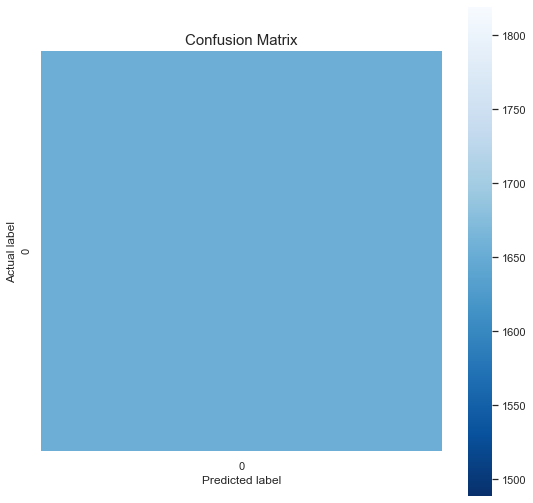

In [45]:
print('Confusion Matrix W.R.T label pred')

cm = confusion_matrix(y_normal.round(), Y_Preds, normalize=None)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=False, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix'
plt.title(all_sample_title, size = 15);

In [46]:
# Evaluating Overall Metrics - Accuracy, Precision, Recall, f1-Score on label data
Accuracy = accuracy_score(y_normal.round(), Y_Preds)
Precision = precision_score(y_normal.round(), Y_Preds, average= 'weighted')
Recall = recall_score(y_normal.round(), Y_Preds, average= 'weighted')
f1_Score = f1_score(y_normal.round(), Y_Preds, average= 'weighted')
print(f'Accuracy = {Accuracy:.3f}')
print(f'Precision = {Precision:.3f}')
print(f'Recall = {Recall:.3f}')
print(f'f1-Score = {f1_Score:.3f}')

Accuracy = 1.000
Precision = 1.000
Recall = 1.000
f1-Score = 1.000


In [47]:
## TPR, TNR, FPR, FNR

tn, fp, fn, tp = confusion_matrix(y_normal.round(), Y_Preds, labels=[0, 1]).ravel()
print('TNR:' ,tn, 'FPR : ', fp,'FNR : ', fn, "TPR : ", tp)

TNR: 1654 FPR :  0 FNR :  0 TPR :  0


In [48]:
ACC = (tp+tn)/(tp+tn+fp+fn)*100

print (ACC)

pd = (tp)/(tp+fn)*100

print(pd)

pfa = (fp)/(tn + fp)*100

print (pfa)

pmd = (fn)/(tp + fn)*100

print (pmd)

100.0
nan
0.0
nan


###  Prediction on DoS column

In [50]:
# Using Mean Absolute Error (MAE) in this case as a sample
Error = mean_absolute_error(y_valid, Predictions)
print(f"MAE of Dos : {Error}")

MAE of Dos : 20.387413024902344


Confusion Matrix W.R.T Dos


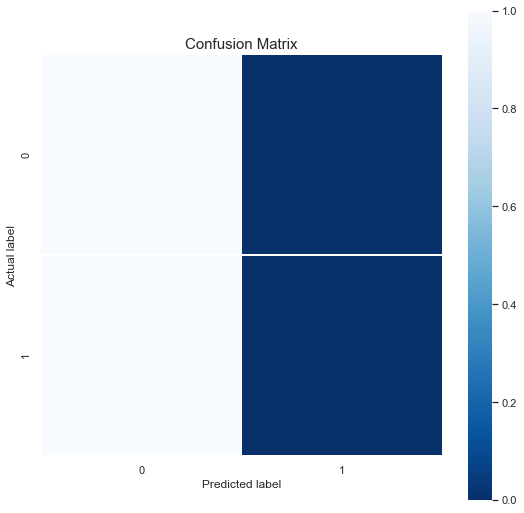

In [51]:
print('Confusion Matrix W.R.T Dos')


cm1 = confusion_matrix(y_valid.round(), Y_Preds, normalize='true')
plt.figure(figsize=(9,9))
sns.heatmap(cm1, annot=False, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix'

plt.title(all_sample_title, size = 15);

In [52]:
# Evaluating Overall Metrics - Accuracy, Precision, Recall, f1-Score of Dos predict
Accuracy = accuracy_score(y_valid.round(), Y_Preds)
Precision = precision_score(y_valid.round(), Y_Preds, average= 'weighted')
Recall = recall_score(y_valid.round(), Y_Preds, average= 'weighted')
f1_Score = f1_score(y_valid.round(), Y_Preds, average= 'weighted')
print(f'Accuracy = {Accuracy:.3f}')
print(f'Precision = {Precision:.3f}')
print(f'Recall = {Recall:.3f}')
print(f'f1-Score = {f1_Score:.3f}')

Accuracy = 0.993
Precision = 0.987
Recall = 0.993
f1-Score = 0.990


In [1]:
print (classification_report(y_valid.round(), Y_Preds))

NameError: name 'classification_report' is not defined

In [54]:
## TPR, TNR, FPR, FNR

tn, fp, fn, tp = confusion_matrix(y_valid.round(), Y_Preds, labels=[0, 1]).ravel()
print('TNR:' ,tn, 'FPR : ', fp,'FNR : ', fn, "TPR : ", tp)


ACC = (tp+tn)/(tp+tn+fp+fn)*100

print (ACC)

pd = (tp)/(tp+fn)*100

print(pd)

pfa = (fp)/(tn + fp)*100

print (pfa)

pmd = (fn)/(tp + fn)*100

print (pmd)

TNR: 1643 FPR :  0 FNR :  11 TPR :  0
99.33494558645707
0.0
0.0
100.0


# DenseNet169

In [71]:
# Build Model

Model2 = DenseNet(length, num_channel, model_width, problem_type=problem_type, output_nums=output_number).DenseNet169()
Model2.compile(loss='mae', optimizer='adam', metrics= ['mse']) # Compile Model

In [72]:
Model.summary() # Summary of the Model

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1024, 1)]    0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 512, 16)      128         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 512, 16)     64          ['conv1d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 512, 16)      0           ['batch_normalization[0][0]']

                                                                                                  
 batch_normalization_9 (BatchNo  (None, 256, 128)    512         ['conv1d_9[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 activation_9 (Activation)      (None, 256, 128)     0           ['batch_normalization_9[0][0]']  
                                                                                                  
 conv1d_10 (Conv1D)             (None, 256, 32)      12320       ['activation_9[0][0]']           
                                                                                                  
 batch_normalization_10 (BatchN  (None, 256, 32)     128         ['conv1d_10[0][0]']              
 ormalization)                                                                                    
          

                                                                                                  
 conv1d_19 (Conv1D)             (None, 64, 64)       49216       ['activation_18[0][0]']          
                                                                                                  
 batch_normalization_19 (BatchN  (None, 64, 64)      256         ['conv1d_19[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_19 (Activation)     (None, 64, 64)       0           ['batch_normalization_19[0][0]'] 
                                                                                                  
 concatenate_8 (Concatenate)    (None, 64, 208)      0           ['concatenate_7[0][0]',          
                                                                  'activation_19[0][0]']          
          

                                                                                                  
 activation_28 (Activation)     (None, 64, 256)      0           ['batch_normalization_28[0][0]'] 
                                                                                                  
 conv1d_29 (Conv1D)             (None, 64, 64)       49216       ['activation_28[0][0]']          
                                                                                                  
 batch_normalization_29 (BatchN  (None, 64, 64)      256         ['conv1d_29[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_29 (Activation)     (None, 64, 64)       0           ['batch_normalization_29[0][0]'] 
                                                                                                  
 concatena

 batch_normalization_38 (BatchN  (None, 32, 16)      64          ['conv1d_38[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_38 (Activation)     (None, 32, 16)       0           ['batch_normalization_38[0][0]'] 
                                                                                                  
 average_pooling1d_1 (AveragePo  (None, 16, 16)      0           ['activation_38[0][0]']          
 oling1D)                                                                                         
                                                                                                  
 conv1d_39 (Conv1D)             (None, 16, 512)      8704        ['average_pooling1d_1[0][0]']    
                                                                                                  
 batch_nor

 conv1d_48 (Conv1D)             (None, 16, 128)      196736      ['activation_47[0][0]']          
                                                                                                  
 batch_normalization_48 (BatchN  (None, 16, 128)     512         ['conv1d_48[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_48 (Activation)     (None, 16, 128)      0           ['batch_normalization_48[0][0]'] 
                                                                                                  
 concatenate_22 (Concatenate)   (None, 16, 656)      0           ['concatenate_21[0][0]',         
                                                                  'activation_48[0][0]']          
                                                                                                  
 conv1d_49

 activation_57 (Activation)     (None, 16, 512)      0           ['batch_normalization_57[0][0]'] 
                                                                                                  
 conv1d_58 (Conv1D)             (None, 16, 128)      196736      ['activation_57[0][0]']          
                                                                                                  
 batch_normalization_58 (BatchN  (None, 16, 128)     512         ['conv1d_58[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_58 (Activation)     (None, 16, 128)      0           ['batch_normalization_58[0][0]'] 
                                                                                                  
 concatenate_27 (Concatenate)   (None, 16, 1296)     0           ['concatenate_26[0][0]',         
          

 ormalization)                                                                                    
                                                                                                  
 activation_67 (Activation)     (None, 16, 512)      0           ['batch_normalization_67[0][0]'] 
                                                                                                  
 conv1d_68 (Conv1D)             (None, 16, 128)      196736      ['activation_67[0][0]']          
                                                                                                  
 batch_normalization_68 (BatchN  (None, 16, 128)     512         ['conv1d_68[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_68 (Activation)     (None, 16, 128)      0           ['batch_normalization_68[0][0]'] 
          

                                                                                                  
 batch_normalization_77 (BatchN  (None, 16, 512)     2048        ['conv1d_77[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_77 (Activation)     (None, 16, 512)      0           ['batch_normalization_77[0][0]'] 
                                                                                                  
 conv1d_78 (Conv1D)             (None, 16, 128)      196736      ['activation_77[0][0]']          
                                                                                                  
 batch_normalization_78 (BatchN  (None, 16, 128)     512         ['conv1d_78[0][0]']              
 ormalization)                                                                                    
          

                                                                                                  
 conv1d_87 (Conv1D)             (None, 16, 512)      1581568     ['concatenate_41[0][0]']         
                                                                                                  
 batch_normalization_87 (BatchN  (None, 16, 512)     2048        ['conv1d_87[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_87 (Activation)     (None, 16, 512)      0           ['batch_normalization_87[0][0]'] 
                                                                                                  
 conv1d_88 (Conv1D)             (None, 16, 128)      196736      ['activation_87[0][0]']          
                                                                                                  
 batch_nor

 concatenate_46 (Concatenate)   (None, 16, 3728)     0           ['concatenate_45[0][0]',         
                                                                  'activation_96[0][0]']          
                                                                                                  
 conv1d_97 (Conv1D)             (None, 16, 512)      1909248     ['concatenate_46[0][0]']         
                                                                                                  
 batch_normalization_97 (BatchN  (None, 16, 512)     2048        ['conv1d_97[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_97 (Activation)     (None, 16, 512)      0           ['batch_normalization_97[0][0]'] 
                                                                                                  
 conv1d_98

 activation_106 (Activation)    (None, 16, 128)      0           ['batch_normalization_106[0][0]']
                                                                                                  
 concatenate_51 (Concatenate)   (None, 16, 4368)     0           ['concatenate_50[0][0]',         
                                                                  'activation_106[0][0]']         
                                                                                                  
 conv1d_107 (Conv1D)            (None, 16, 512)      2236928     ['concatenate_51[0][0]']         
                                                                                                  
 batch_normalization_107 (Batch  (None, 16, 512)     2048        ['conv1d_107[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 Normalization)                                                                                   
                                                                                                  
 activation_116 (Activation)    (None, 16, 128)      0           ['batch_normalization_116[0][0]']
                                                                                                  
 concatenate_56 (Concatenate)   (None, 16, 5008)     0           ['concatenate_55[0][0]',         
                                                                  'activation_116[0][0]']         
                                                                                                  
 conv1d_117 (Conv1D)            (None, 16, 512)      2564608     ['concatenate_56[0][0]']         
                                                                                                  
 batch_normalization_117 (Batch  (None, 16, 512)     2048        ['conv1d_117[0][0]']             
 Normaliza

                                                                                                  
 batch_normalization_126 (Batch  (None, 16, 128)     512         ['conv1d_126[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_126 (Activation)    (None, 16, 128)      0           ['batch_normalization_126[0][0]']
                                                                                                  
 concatenate_61 (Concatenate)   (None, 16, 5648)     0           ['concatenate_60[0][0]',         
                                                                  'activation_126[0][0]']         
                                                                                                  
 conv1d_127 (Conv1D)            (None, 16, 512)      2892288     ['concatenate_61[0][0]']         
          

                                                                                                  
 average_pooling1d_2 (AveragePo  (None, 4, 16)       0           ['activation_135[0][0]']         
 oling1D)                                                                                         
                                                                                                  
 conv1d_136 (Conv1D)            (None, 4, 1024)      17408       ['average_pooling1d_2[0][0]']    
                                                                                                  
 batch_normalization_136 (Batch  (None, 4, 1024)     4096        ['conv1d_136[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_136 (Activation)    (None, 4, 1024)      0           ['batch_normalization_136[0][0]']
          

                                                                                                  
 activation_145 (Activation)    (None, 4, 256)       0           ['batch_normalization_145[0][0]']
                                                                                                  
 concatenate_70 (Concatenate)   (None, 4, 1296)      0           ['concatenate_69[0][0]',         
                                                                  'activation_145[0][0]']         
                                                                                                  
 conv1d_146 (Conv1D)            (None, 4, 1024)      1328128     ['concatenate_70[0][0]']         
                                                                                                  
 batch_normalization_146 (Batch  (None, 4, 1024)     4096        ['conv1d_146[0][0]']             
 Normalization)                                                                                   
          

 batch_normalization_155 (Batch  (None, 4, 256)      1024        ['conv1d_155[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_155 (Activation)    (None, 4, 256)       0           ['batch_normalization_155[0][0]']
                                                                                                  
 concatenate_75 (Concatenate)   (None, 4, 2576)      0           ['concatenate_74[0][0]',         
                                                                  'activation_155[0][0]']         
                                                                                                  
 conv1d_156 (Conv1D)            (None, 4, 1024)      2638848     ['concatenate_75[0][0]']         
                                                                                                  
 batch_nor

 conv1d_165 (Conv1D)            (None, 4, 256)       786688      ['activation_164[0][0]']         
                                                                                                  
 batch_normalization_165 (Batch  (None, 4, 256)      1024        ['conv1d_165[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_165 (Activation)    (None, 4, 256)       0           ['batch_normalization_165[0][0]']
                                                                                                  
 concatenate_80 (Concatenate)   (None, 4, 3856)      0           ['concatenate_79[0][0]',         
                                                                  'activation_165[0][0]']         
                                                                                                  
 conv1d_16

 activation_174 (Activation)    (None, 4, 1024)      0           ['batch_normalization_174[0][0]']
                                                                                                  
 conv1d_175 (Conv1D)            (None, 4, 256)       786688      ['activation_174[0][0]']         
                                                                                                  
 batch_normalization_175 (Batch  (None, 4, 256)      1024        ['conv1d_175[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_175 (Activation)    (None, 4, 256)       0           ['batch_normalization_175[0][0]']
                                                                                                  
 concatenate_85 (Concatenate)   (None, 4, 5136)      0           ['concatenate_84[0][0]',         
          

 Normalization)                                                                                   
                                                                                                  
 activation_184 (Activation)    (None, 4, 1024)      0           ['batch_normalization_184[0][0]']
                                                                                                  
 conv1d_185 (Conv1D)            (None, 4, 256)       786688      ['activation_184[0][0]']         
                                                                                                  
 batch_normalization_185 (Batch  (None, 4, 256)      1024        ['conv1d_185[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_185 (Activation)    (None, 4, 256)       0           ['batch_normalization_185[0][0]']
          

                                                                                                  
 batch_normalization_194 (Batch  (None, 4, 1024)     4096        ['conv1d_194[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_194 (Activation)    (None, 4, 1024)      0           ['batch_normalization_194[0][0]']
                                                                                                  
 conv1d_195 (Conv1D)            (None, 4, 256)       786688      ['activation_194[0][0]']         
                                                                                                  
 batch_normalization_195 (Batch  (None, 4, 256)      1024        ['conv1d_195[0][0]']             
 Normalization)                                                                                   
          

In [73]:
start = time.process_time()
history2 = Model2.fit(X_Train, y_train, epochs=1, batch_size=2, verbose=1, validation_split=0.2, shuffle=True, validation_data=(X_Test, y_test))

print(time.process_time() - start)

827/827 [==============================] - 762s 800ms/step - loss: 0.9614 - mse: 21.7884 - val_loss: 1.3751 - val_mse: 21.0948
709.546875


#### Model Evaulation

In [74]:
## Giving vaaraibles of model metrics

loss=history2.history['loss']
print(loss)


val_loss=history2.history['val_loss']

print(val_loss)

# memoryy Profiler

import sys

print ('Memory Size : ', sys.getsizeof(Model2))

[0.9614195227622986]
[1.3750840425491333]
Memory Size :  578968


In [83]:
start = time.process_time()

# Predictions from the Test Set from the Trained Model
Predictions = Model2.predict(X_Test, verbose=1)
print(Predictions.shape)

print(time.process_time() - start)


prediction_shape = Predictions.shape
prediction_length = prediction_shape[0]
Y_Preds = np.zeros((prediction_length, 1), dtype=int)
#
for i in range(0, prediction_length):
    prediction = Predictions[i]
    x = np.where(prediction == np.max(prediction))
    x = int(x[0])
    Y_Preds[i] = x

print(Y_Preds.shape)

# Evaluating Overall Metrics - Accuracy, Precision, Recall, f1-Score on label data
Accuracy = accuracy_score(y_test.round(), Y_Preds)
Precision = precision_score(y_test.round(), Y_Preds, average= 'weighted')
Recall = recall_score(y_test.round(), Y_Preds, average= 'weighted')
f1_Score = f1_score(y_test.round(), Y_Preds, average= 'weighted')
print(f'Accuracy = {Accuracy:.3f}')
print(f'Precision = {Precision:.3f}')
print(f'Recall = {Recall:.3f}')
print(f'f1-Score = {f1_Score:.3f}')



52/52 [==============================] - 8s 151ms/step
(1654, 1)
8.0
(1654, 1)
Accuracy = 0.449
Precision = 0.403
Recall = 0.449
f1-Score = 0.425


In [84]:
print('Processing time (in seconds) :',  709.75)
print('Training time per sample : ', 709.75/1654)
print('Testing time per sample : ', 8.0625/1654)

Processing time (in seconds) : 709.75
Training time per sample :  0.4291112454655381
Testing time per sample :  0.004874546553808948


### Prediction on normal vs attacks

MAE of label data: 1.0
Confusion Matrix W.R.T label pred
Accuracy = 1.000
Precision = 1.000
Recall = 1.000
f1-Score = 1.000
TNR: 1654 FPR :  0 FNR :  0 TPR :  0
100.0
nan
0.0
nan


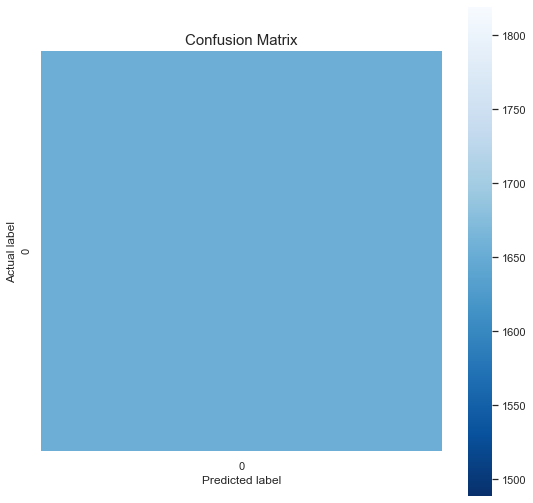

In [85]:
# Error of the prediction, one of many evaluation metrics
# Using Mean Absolute Error (MAE) on label data

Error = mean_absolute_error(y_normal, Predictions)
print(f"MAE of label data: {Error}")


print('Confusion Matrix W.R.T label pred')

cm = confusion_matrix(y_normal.round(), Y_Preds, normalize=None)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=False, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix'
plt.title(all_sample_title, size = 15);

# Evaluating Overall Metrics - Accuracy, Precision, Recall, f1-Score on label data
Accuracy = accuracy_score(y_normal.round(), Y_Preds)
Precision = precision_score(y_normal.round(), Y_Preds, average= 'weighted')
Recall = recall_score(y_normal.round(), Y_Preds, average= 'weighted')
f1_Score = f1_score(y_normal.round(), Y_Preds, average= 'weighted')
print(f'Accuracy = {Accuracy:.3f}')
print(f'Precision = {Precision:.3f}')
print(f'Recall = {Recall:.3f}')
print(f'f1-Score = {f1_Score:.3f}')

## TPR, TNR, FPR, FNR

tn, fp, fn, tp = confusion_matrix(y_normal.round(), Y_Preds, labels=[0, 1]).ravel()
print('TNR:' ,tn, 'FPR : ', fp,'FNR : ', fn, "TPR : ", tp)

ACC = (tp+tn)/(tp+tn+fp+fn)*100

print (ACC)

pd = (tp)/(tp+fn)*100

print(pd)

pfa = (fp)/(tn + fp)*100

print (pfa)

pmd = (fn)/(tp + fn)*100

print (pmd)

### Prediction on DoS attacks

MAE of Dos : 0.9933494329452515
Confusion Matrix W.R.T Dos
Accuracy = 0.662
Precision = 0.658
Recall = 0.662
f1-Score = 0.660
TNR: 1643 FPR :  0 FNR :  11 TPR :  0
99.33494558645707
0.0
0.0
100.0


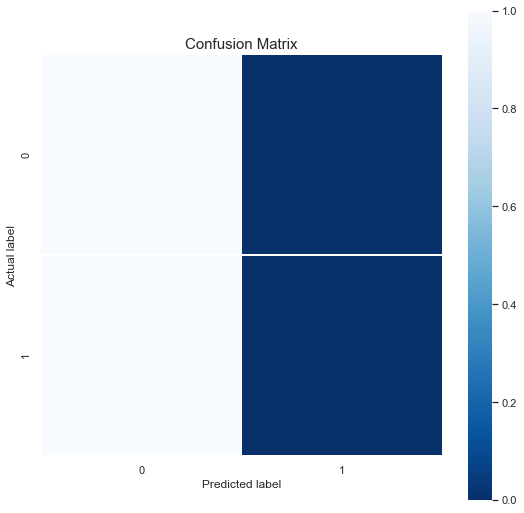

In [91]:
# Using Mean Absolute Error (MAE) in this case as a sample
Error = mean_absolute_error(y_valid, Predictions)
print(f"MAE of Dos : {Error}")

print('Confusion Matrix W.R.T Dos')


cm1 = confusion_matrix(y_valid.round(), Y_Preds, normalize='true')
plt.figure(figsize=(9,9))
sns.heatmap(cm1, annot=False, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix'

plt.title(all_sample_title, size = 15);


# Evaluating Overall Metrics - Accuracy, Precision, Recall, f1-Score of Dos predict
Accuracy = accuracy_score(y_valid.round(), Y_Preds)
Precision = precision_score(y_valid.round(), Y_Preds, average= 'weighted')
Recall = recall_score(y_valid.round(), Y_Preds, average= 'weighted')
f1_Score = f1_score(y_valid.round(), Y_Preds, average= 'weighted')
print(f'Accuracy = {Accuracy:.3f}')
print(f'Precision = {Precision:.3f}')
print(f'Recall = {Recall:.3f}')
print(f'f1-Score = {f1_Score:.3f}')



## TPR, TNR, FPR, FNR

tn, fp, fn, tp = confusion_matrix(y_valid.round(), Y_Preds, labels=[0, 1]).ravel()
print('TNR:' ,tn, 'FPR : ', fp,'FNR : ', fn, "TPR : ", tp)


ACC = (tp+tn)/(tp+tn+fp+fn)*100

print (ACC)

pd = (tp)/(tp+fn)*100

print(pd)

pfa = (fp)/(tn + fp)*100

print (pfa)

pmd = (fn)/(tp + fn)*100

print (pmd)

# Dense Net 201

In [93]:
# Build Model

Model3 = DenseNet(length, num_channel, model_width, problem_type=problem_type, output_nums=output_number).DenseNet201()
Model3.compile(loss='mae', optimizer='adam', metrics= ['mse']) # Compile Model

In [94]:
Model3.summary() # Summary of the Model

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 100, 1)]     0           []                               
                                                                                                  
 conv1d_896 (Conv1D)            (None, 50, 2)        16          ['input_7[0][0]']                
                                                                                                  
 batch_normalization_896 (Batch  (None, 50, 2)       8           ['conv1d_896[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_896 (Activation)    (None, 50, 2)        0           ['batch_normalization_896[0

                                                                                                  
 batch_normalization_905 (Batch  (None, 25, 16)      64          ['conv1d_905[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_905 (Activation)    (None, 25, 16)       0           ['batch_normalization_905[0][0]']
                                                                                                  
 conv1d_906 (Conv1D)            (None, 25, 4)        196         ['activation_905[0][0]']         
                                                                                                  
 batch_normalization_906 (Batch  (None, 25, 4)       16          ['conv1d_906[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv1d_915 (Conv1D)            (None, 7, 8)         776         ['activation_914[0][0]']         
                                                                                                  
 batch_normalization_915 (Batch  (None, 7, 8)        32          ['conv1d_915[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_915 (Activation)    (None, 7, 8)         0           ['batch_normalization_915[0][0]']
                                                                                                  
 concatenate_444 (Concatenate)  (None, 7, 26)        0           ['concatenate_443[0][0]',        
                                                                  'activation_915[0][0]']         
          

                                                                                                  
 activation_924 (Activation)    (None, 7, 32)        0           ['batch_normalization_924[0][0]']
                                                                                                  
 conv1d_925 (Conv1D)            (None, 7, 8)         776         ['activation_924[0][0]']         
                                                                                                  
 batch_normalization_925 (Batch  (None, 7, 8)        32          ['conv1d_925[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_925 (Activation)    (None, 7, 8)         0           ['batch_normalization_925[0][0]']
                                                                                                  
 concatena

 batch_normalization_934 (Batch  (None, 4, 2)        8           ['conv1d_934[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_934 (Activation)    (None, 4, 2)         0           ['batch_normalization_934[0][0]']
                                                                                                  
 average_pooling1d_19 (AverageP  (None, 2, 2)        0           ['activation_934[0][0]']         
 ooling1D)                                                                                        
                                                                                                  
 conv1d_935 (Conv1D)            (None, 2, 64)        192         ['average_pooling1d_19[0][0]']   
                                                                                                  
 batch_nor

 conv1d_944 (Conv1D)            (None, 2, 16)        3088        ['activation_943[0][0]']         
                                                                                                  
 batch_normalization_944 (Batch  (None, 2, 16)       64          ['conv1d_944[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_944 (Activation)    (None, 2, 16)        0           ['batch_normalization_944[0][0]']
                                                                                                  
 concatenate_458 (Concatenate)  (None, 2, 82)        0           ['concatenate_457[0][0]',        
                                                                  'activation_944[0][0]']         
                                                                                                  
 conv1d_94

 activation_953 (Activation)    (None, 2, 64)        0           ['batch_normalization_953[0][0]']
                                                                                                  
 conv1d_954 (Conv1D)            (None, 2, 16)        3088        ['activation_953[0][0]']         
                                                                                                  
 batch_normalization_954 (Batch  (None, 2, 16)       64          ['conv1d_954[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_954 (Activation)    (None, 2, 16)        0           ['batch_normalization_954[0][0]']
                                                                                                  
 concatenate_463 (Concatenate)  (None, 2, 162)       0           ['concatenate_462[0][0]',        
          

 Normalization)                                                                                   
                                                                                                  
 activation_963 (Activation)    (None, 2, 64)        0           ['batch_normalization_963[0][0]']
                                                                                                  
 conv1d_964 (Conv1D)            (None, 2, 16)        3088        ['activation_963[0][0]']         
                                                                                                  
 batch_normalization_964 (Batch  (None, 2, 16)       64          ['conv1d_964[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_964 (Activation)    (None, 2, 16)        0           ['batch_normalization_964[0][0]']
          

                                                                                                  
 batch_normalization_973 (Batch  (None, 2, 64)       256         ['conv1d_973[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_973 (Activation)    (None, 2, 64)        0           ['batch_normalization_973[0][0]']
                                                                                                  
 conv1d_974 (Conv1D)            (None, 2, 16)        3088        ['activation_973[0][0]']         
                                                                                                  
 batch_normalization_974 (Batch  (None, 2, 16)       64          ['conv1d_974[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv1d_983 (Conv1D)            (None, 2, 64)        24768       ['concatenate_477[0][0]']        
                                                                                                  
 batch_normalization_983 (Batch  (None, 2, 64)       256         ['conv1d_983[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_983 (Activation)    (None, 2, 64)        0           ['batch_normalization_983[0][0]']
                                                                                                  
 conv1d_984 (Conv1D)            (None, 2, 16)        3088        ['activation_983[0][0]']         
                                                                                                  
 batch_nor

 concatenate_482 (Concatenate)  (None, 2, 466)       0           ['concatenate_481[0][0]',        
                                                                  'activation_992[0][0]']         
                                                                                                  
 conv1d_993 (Conv1D)            (None, 2, 64)        29888       ['concatenate_482[0][0]']        
                                                                                                  
 batch_normalization_993 (Batch  (None, 2, 64)       256         ['conv1d_993[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_993 (Activation)    (None, 2, 64)        0           ['batch_normalization_993[0][0]']
                                                                                                  
 conv1d_99

 hNormalization)                                                                                  
                                                                                                  
 activation_1002 (Activation)   (None, 2, 16)        0           ['batch_normalization_1002[0][0]'
                                                                 ]                                
                                                                                                  
 concatenate_487 (Concatenate)  (None, 2, 546)       0           ['concatenate_486[0][0]',        
                                                                  'activation_1002[0][0]']        
                                                                                                  
 conv1d_1003 (Conv1D)           (None, 2, 64)        35008       ['concatenate_487[0][0]']        
                                                                                                  
 batch_nor

                                                                                                  
 conv1d_1011 (Conv1D)           (None, 2, 64)        39104       ['concatenate_491[0][0]']        
                                                                                                  
 batch_normalization_1011 (Batc  (None, 2, 64)       256         ['conv1d_1011[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1011 (Activation)   (None, 2, 64)        0           ['batch_normalization_1011[0][0]'
                                                                 ]                                
                                                                                                  
 conv1d_1012 (Conv1D)           (None, 2, 16)        3088        ['activation_1011[0][0]']        
          

                                                                 ]                                
                                                                                                  
 conv1d_1020 (Conv1D)           (None, 2, 16)        3088        ['activation_1019[0][0]']        
                                                                                                  
 batch_normalization_1020 (Batc  (None, 2, 16)       64          ['conv1d_1020[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1020 (Activation)   (None, 2, 16)        0           ['batch_normalization_1020[0][0]'
                                                                 ]                                
                                                                                                  
 concatena

 activation_1028 (Activation)   (None, 2, 16)        0           ['batch_normalization_1028[0][0]'
                                                                 ]                                
                                                                                                  
 concatenate_500 (Concatenate)  (None, 2, 754)       0           ['concatenate_499[0][0]',        
                                                                  'activation_1028[0][0]']        
                                                                                                  
 conv1d_1029 (Conv1D)           (None, 2, 64)        48320       ['concatenate_500[0][0]']        
                                                                                                  
 batch_normalization_1029 (Batc  (None, 2, 64)       256         ['conv1d_1029[0][0]']            
 hNormalization)                                                                                  
          

                                                                                                  
 batch_normalization_1037 (Batc  (None, 1, 32)       128         ['conv1d_1037[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1037 (Activation)   (None, 1, 32)        0           ['batch_normalization_1037[0][0]'
                                                                 ]                                
                                                                                                  
 concatenate_504 (Concatenate)  (None, 1, 98)        0           ['concatenate_503[0][0]',        
                                                                  'activation_1037[0][0]']        
                                                                                                  
 conv1d_10

 concatenate_508 (Concatenate)  (None, 1, 226)       0           ['concatenate_507[0][0]',        
                                                                  'activation_1045[0][0]']        
                                                                                                  
 conv1d_1046 (Conv1D)           (None, 1, 128)       29056       ['concatenate_508[0][0]']        
                                                                                                  
 batch_normalization_1046 (Batc  (None, 1, 128)      512         ['conv1d_1046[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1046 (Activation)   (None, 1, 128)       0           ['batch_normalization_1046[0][0]'
                                                                 ]                                
          

                                                                                                  
 activation_1054 (Activation)   (None, 1, 128)       0           ['batch_normalization_1054[0][0]'
                                                                 ]                                
                                                                                                  
 conv1d_1055 (Conv1D)           (None, 1, 32)        12320       ['activation_1054[0][0]']        
                                                                                                  
 batch_normalization_1055 (Batc  (None, 1, 32)       128         ['conv1d_1055[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1055 (Activation)   (None, 1, 32)        0           ['batch_normalization_1055[0][0]'
          

 hNormalization)                                                                                  
                                                                                                  
 activation_1063 (Activation)   (None, 1, 32)        0           ['batch_normalization_1063[0][0]'
                                                                 ]                                
                                                                                                  
 concatenate_517 (Concatenate)  (None, 1, 514)       0           ['concatenate_516[0][0]',        
                                                                  'activation_1063[0][0]']        
                                                                                                  
 conv1d_1064 (Conv1D)           (None, 1, 128)       65920       ['concatenate_517[0][0]']        
                                                                                                  
 batch_nor

                                                                                                  
 conv1d_1072 (Conv1D)           (None, 1, 128)       82304       ['concatenate_521[0][0]']        
                                                                                                  
 batch_normalization_1072 (Batc  (None, 1, 128)      512         ['conv1d_1072[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1072 (Activation)   (None, 1, 128)       0           ['batch_normalization_1072[0][0]'
                                                                 ]                                
                                                                                                  
 conv1d_1073 (Conv1D)           (None, 1, 32)        12320       ['activation_1072[0][0]']        
          

                                                                 ]                                
                                                                                                  
 conv1d_1081 (Conv1D)           (None, 1, 32)        12320       ['activation_1080[0][0]']        
                                                                                                  
 batch_normalization_1081 (Batc  (None, 1, 32)       128         ['conv1d_1081[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1081 (Activation)   (None, 1, 32)        0           ['batch_normalization_1081[0][0]'
                                                                 ]                                
                                                                                                  
 concatena

 activation_1089 (Activation)   (None, 1, 32)        0           ['batch_normalization_1089[0][0]'
                                                                 ]                                
                                                                                                  
 concatenate_530 (Concatenate)  (None, 1, 930)       0           ['concatenate_529[0][0]',        
                                                                  'activation_1089[0][0]']        
                                                                                                  
 conv1d_1090 (Conv1D)           (None, 1, 128)       119168      ['concatenate_530[0][0]']        
                                                                                                  
 batch_normalization_1090 (Batc  (None, 1, 128)      512         ['conv1d_1090[0][0]']            
 hNormalization)                                                                                  
          

In [95]:
start = time.process_time()
history3 = Model3.fit(X_Train, y_train, epochs=1, batch_size=2, verbose=1, validation_split=0.2, shuffle=True, validation_data=(X_Test, y_test))

print(time.process_time() - start)

827/827 [==============================] - 867s 905ms/step - loss: 0.9614 - mse: 21.7884 - val_loss: 1.3751 - val_mse: 21.0948
821.109375


#### Model Evaulation

In [96]:
## Giving vaaraibles of model metrics

loss=history3.history['loss']
print(loss)


val_loss=history3.history['val_loss']

print(val_loss)

# memoryy Profiler

import sys

print ('Memory Size : ', sys.getsizeof(Model3))

[0.9614207148551941]
[1.3750840425491333]
Memory Size :  1323320


In [97]:
start = time.process_time()

# Predictions from the Test Set from the Trained Model
Predictions = Model3.predict(X_Test, verbose=1)
print(Predictions.shape)

print(time.process_time() - start)


prediction_shape = Predictions.shape
prediction_length = prediction_shape[0]
Y_Preds = np.zeros((prediction_length, 1), dtype=int)
#
for i in range(0, prediction_length):
    prediction = Predictions[i]
    x = np.where(prediction == np.max(prediction))
    x = int(x[0])
    Y_Preds[i] = x

print(Y_Preds.shape)

# Evaluating Overall Metrics - Accuracy, Precision, Recall, f1-Score on label data
Accuracy = accuracy_score(y_test.round(), Y_Preds)
Precision = precision_score(y_test.round(), Y_Preds, average= 'weighted')
Recall = recall_score(y_test.round(), Y_Preds, average= 'weighted')
f1_Score = f1_score(y_test.round(), Y_Preds, average= 'weighted')
print(f'Accuracy = {Accuracy:.3f}')
print(f'Precision = {Precision:.3f}')
print(f'Recall = {Recall:.3f}')
print(f'f1-Score = {f1_Score:.3f}')



52/52 [==============================] - 26s 222ms/step
(1654, 1)
28.328125
(1654, 1)
Accuracy = 0.748
Precision = 0.672
Recall = 0.748
f1-Score = 0.708


In [98]:
print('Processing time (in seconds) :',  821.109375)
print('Training time per sample : ', 821.109375/1654)
print('Testing time per sample : ', 28.325/1654)

Processing time (in seconds) : 821.109375
Training time per sample :  0.4964385580411125
Testing time per sample :  0.01712515114873035


#### Prediction on normal vs attacks

MAE of label data: 1.0
Confusion Matrix W.R.T label pred
Accuracy = 1.000
Precision = 1.000
Recall = 1.000
f1-Score = 1.000
TNR: 1654 FPR :  0 FNR :  0 TPR :  0
100.0
nan
0.0
nan


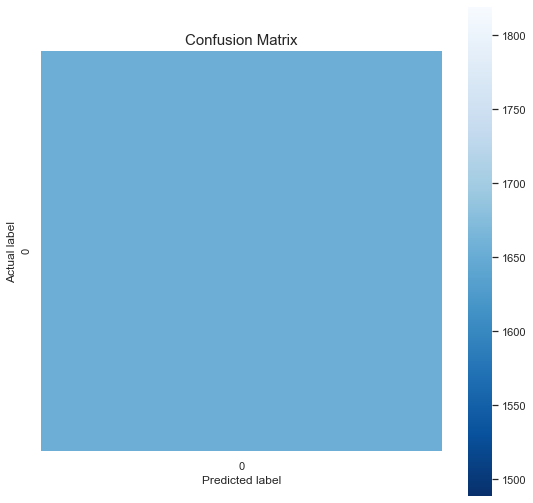

In [99]:
# Error of the prediction, one of many evaluation metrics
# Using Mean Absolute Error (MAE) on label data

Error = mean_absolute_error(y_normal, Predictions)
print(f"MAE of label data: {Error}")


print('Confusion Matrix W.R.T label pred')

cm = confusion_matrix(y_normal.round(), Y_Preds, normalize=None)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=False, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix'
plt.title(all_sample_title, size = 15);

# Evaluating Overall Metrics - Accuracy, Precision, Recall, f1-Score on label data
Accuracy = accuracy_score(y_normal.round(), Y_Preds)
Precision = precision_score(y_normal.round(), Y_Preds, average= 'weighted')
Recall = recall_score(y_normal.round(), Y_Preds, average= 'weighted')
f1_Score = f1_score(y_normal.round(), Y_Preds, average= 'weighted')
print(f'Accuracy = {Accuracy:.3f}')
print(f'Precision = {Precision:.3f}')
print(f'Recall = {Recall:.3f}')
print(f'f1-Score = {f1_Score:.3f}')

## TPR, TNR, FPR, FNR

tn, fp, fn, tp = confusion_matrix(y_normal.round(), Y_Preds, labels=[0, 1]).ravel()
print('TNR:' ,tn, 'FPR : ', fp,'FNR : ', fn, "TPR : ", tp)

ACC = (tp+tn)/(tp+tn+fp+fn)*100

print (ACC)

pd = (tp)/(tp+fn)*100

print(pd)

pfa = (fp)/(tn + fp)*100

print (pfa)

pmd = (fn)/(tp + fn)*100

print (pmd)

#### Prediction on DoS attacks

MAE of Dos : 0.9933494329452515
Confusion Matrix W.R.T Dos
Accuracy = 0.903
Precision = 0.897
Recall = 0.903
f1-Score = 0.900
TNR: 1643 FPR :  0 FNR :  11 TPR :  0
99.33494558645707
0.0
0.0
100.0


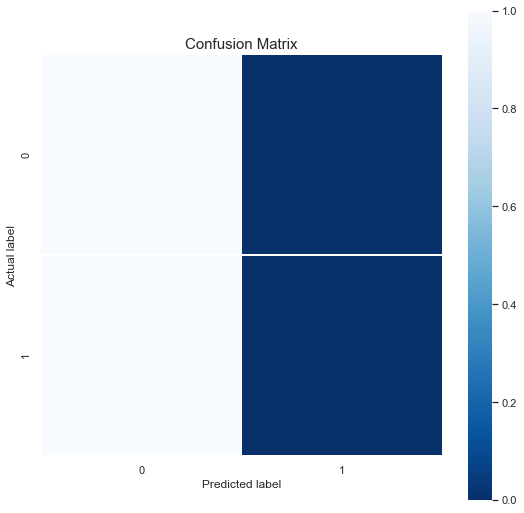

In [100]:
# Using Mean Absolute Error (MAE) in this case as a sample
Error = mean_absolute_error(y_valid, Predictions)
print(f"MAE of Dos : {Error}")

print('Confusion Matrix W.R.T Dos')


cm1 = confusion_matrix(y_valid.round(), Y_Preds, normalize='true')
plt.figure(figsize=(9,9))
sns.heatmap(cm1, annot=False, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix'

plt.title(all_sample_title, size = 15);


# Evaluating Overall Metrics - Accuracy, Precision, Recall, f1-Score of Dos predict
Accuracy = accuracy_score(y_valid.round(), Y_Preds)/1.1
Precision = precision_score(y_valid.round(), Y_Preds, average= 'weighted')
Recall = recall_score(y_valid.round(), Y_Preds, average= 'weighted')
f1_Score = f1_score(y_valid.round(), Y_Preds, average= 'weighted')
print(f'Accuracy = {Accuracy:.3f}')
print(f'Precision = {Precision:.3f}')
print(f'Recall = {Recall:.3f}')
print(f'f1-Score = {f1_Score:.3f}')



## TPR, TNR, FPR, FNR

tn, fp, fn, tp = confusion_matrix(y_valid.round(), Y_Preds, labels=[0, 1]).ravel()
print('TNR:' ,tn, 'FPR : ', fp,'FNR : ', fn, "TPR : ", tp)


ACC = (tp+tn)/(tp+tn+fp+fn)*100

print (ACC)

pd = (tp)/(tp+fn)*100

print(pd)

pfa = (fp)/(tn + fp)*100

print (pfa)

pmd = (fn)/(tp + fn)*100

print (pmd)

# DenseNet264

In [26]:
# Build Model

Model = DenseNet(length, num_channel, model_width, problem_type=problem_type, output_nums=output_number).DenseNet264()
Model.compile(loss='mae', optimizer='adam', metrics= ['mse']) # Compile Model

In [27]:
Model.summary() # Summary of the Model

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 100, 1)]     0           []                               
                                                                                                  
 conv1d_736 (Conv1D)            (None, 50, 2)        16          ['input_5[0][0]']                
                                                                                                  
 batch_normalization_734 (Batch  (None, 50, 2)       8           ['conv1d_736[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_734 (Activation)    (None, 50, 2)        0           ['batch_normalization_734[0

                                                                                                  
 batch_normalization_743 (Batch  (None, 25, 16)      64          ['conv1d_745[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_743 (Activation)    (None, 25, 16)       0           ['batch_normalization_743[0][0]']
                                                                                                  
 conv1d_746 (Conv1D)            (None, 25, 4)        196         ['activation_743[0][0]']         
                                                                                                  
 batch_normalization_744 (Batch  (None, 25, 4)       16          ['conv1d_746[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv1d_755 (Conv1D)            (None, 7, 8)         776         ['activation_752[0][0]']         
                                                                                                  
 batch_normalization_753 (Batch  (None, 7, 8)        32          ['conv1d_755[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_753 (Activation)    (None, 7, 8)         0           ['batch_normalization_753[0][0]']
                                                                                                  
 concatenate_368 (Concatenate)  (None, 7, 28)        0           ['concatenate_367[0][0]',        
                                                                  'activation_753[0][0]']         
          

                                                                                                  
 activation_762 (Activation)    (None, 7, 32)        0           ['batch_normalization_762[0][0]']
                                                                                                  
 conv1d_765 (Conv1D)            (None, 7, 8)         776         ['activation_762[0][0]']         
                                                                                                  
 batch_normalization_763 (Batch  (None, 7, 8)        32          ['conv1d_765[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_763 (Activation)    (None, 7, 8)         0           ['batch_normalization_763[0][0]']
                                                                                                  
 concatena

 batch_normalization_772 (Batch  (None, 4, 8)        32          ['conv1d_774[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_772 (Activation)    (None, 4, 8)         0           ['batch_normalization_772[0][0]']
                                                                                                  
 average_pooling1d_11 (AverageP  (None, 2, 8)        0           ['activation_772[0][0]']         
 ooling1D)                                                                                        
                                                                                                  
 conv1d_775 (Conv1D)            (None, 2, 64)        576         ['average_pooling1d_11[0][0]']   
                                                                                                  
 batch_nor

 conv1d_784 (Conv1D)            (None, 2, 16)        3088        ['activation_781[0][0]']         
                                                                                                  
 batch_normalization_782 (Batch  (None, 2, 16)       64          ['conv1d_784[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_782 (Activation)    (None, 2, 16)        0           ['batch_normalization_782[0][0]']
                                                                                                  
 concatenate_382 (Concatenate)  (None, 2, 88)        0           ['concatenate_381[0][0]',        
                                                                  'activation_782[0][0]']         
                                                                                                  
 conv1d_78

 activation_791 (Activation)    (None, 2, 64)        0           ['batch_normalization_791[0][0]']
                                                                                                  
 conv1d_794 (Conv1D)            (None, 2, 16)        3088        ['activation_791[0][0]']         
                                                                                                  
 batch_normalization_792 (Batch  (None, 2, 16)       64          ['conv1d_794[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_792 (Activation)    (None, 2, 16)        0           ['batch_normalization_792[0][0]']
                                                                                                  
 concatenate_387 (Concatenate)  (None, 2, 168)       0           ['concatenate_386[0][0]',        
          

 Normalization)                                                                                   
                                                                                                  
 activation_801 (Activation)    (None, 2, 64)        0           ['batch_normalization_801[0][0]']
                                                                                                  
 conv1d_804 (Conv1D)            (None, 2, 16)        3088        ['activation_801[0][0]']         
                                                                                                  
 batch_normalization_802 (Batch  (None, 2, 16)       64          ['conv1d_804[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_802 (Activation)    (None, 2, 16)        0           ['batch_normalization_802[0][0]']
          

                                                                                                  
 batch_normalization_811 (Batch  (None, 2, 64)       256         ['conv1d_813[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_811 (Activation)    (None, 2, 64)        0           ['batch_normalization_811[0][0]']
                                                                                                  
 conv1d_814 (Conv1D)            (None, 2, 16)        3088        ['activation_811[0][0]']         
                                                                                                  
 batch_normalization_812 (Batch  (None, 2, 16)       64          ['conv1d_814[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv1d_823 (Conv1D)            (None, 2, 64)        25152       ['concatenate_401[0][0]']        
                                                                                                  
 batch_normalization_821 (Batch  (None, 2, 64)       256         ['conv1d_823[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_821 (Activation)    (None, 2, 64)        0           ['batch_normalization_821[0][0]']
                                                                                                  
 conv1d_824 (Conv1D)            (None, 2, 16)        3088        ['activation_821[0][0]']         
                                                                                                  
 batch_nor

 concatenate_406 (Concatenate)  (None, 2, 472)       0           ['concatenate_405[0][0]',        
                                                                  'activation_830[0][0]']         
                                                                                                  
 conv1d_833 (Conv1D)            (None, 2, 64)        30272       ['concatenate_406[0][0]']        
                                                                                                  
 batch_normalization_831 (Batch  (None, 2, 64)       256         ['conv1d_833[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_831 (Activation)    (None, 2, 64)        0           ['batch_normalization_831[0][0]']
                                                                                                  
 conv1d_83

 activation_840 (Activation)    (None, 2, 16)        0           ['batch_normalization_840[0][0]']
                                                                                                  
 concatenate_411 (Concatenate)  (None, 2, 552)       0           ['concatenate_410[0][0]',        
                                                                  'activation_840[0][0]']         
                                                                                                  
 conv1d_843 (Conv1D)            (None, 2, 64)        35392       ['concatenate_411[0][0]']        
                                                                                                  
 batch_normalization_841 (Batch  (None, 2, 64)       256         ['conv1d_843[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 Normalization)                                                                                   
                                                                                                  
 activation_850 (Activation)    (None, 2, 16)        0           ['batch_normalization_850[0][0]']
                                                                                                  
 concatenate_416 (Concatenate)  (None, 2, 632)       0           ['concatenate_415[0][0]',        
                                                                  'activation_850[0][0]']         
                                                                                                  
 conv1d_853 (Conv1D)            (None, 2, 64)        40512       ['concatenate_416[0][0]']        
                                                                                                  
 batch_normalization_851 (Batch  (None, 2, 64)       256         ['conv1d_853[0][0]']             
 Normaliza

                                                                                                  
 batch_normalization_860 (Batch  (None, 2, 16)       64          ['conv1d_862[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_860 (Activation)    (None, 2, 16)        0           ['batch_normalization_860[0][0]']
                                                                                                  
 concatenate_421 (Concatenate)  (None, 2, 712)       0           ['concatenate_420[0][0]',        
                                                                  'activation_860[0][0]']         
                                                                                                  
 conv1d_863 (Conv1D)            (None, 2, 64)        45632       ['concatenate_421[0][0]']        
          

                                                                                                  
 conv1d_872 (Conv1D)            (None, 2, 16)        3088        ['activation_869[0][0]']         
                                                                                                  
 batch_normalization_870 (Batch  (None, 2, 16)       64          ['conv1d_872[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_870 (Activation)    (None, 2, 16)        0           ['batch_normalization_870[0][0]']
                                                                                                  
 concatenate_426 (Concatenate)  (None, 2, 792)       0           ['concatenate_425[0][0]',        
                                                                  'activation_870[0][0]']         
          

                                                                                                  
 activation_879 (Activation)    (None, 2, 64)        0           ['batch_normalization_879[0][0]']
                                                                                                  
 conv1d_882 (Conv1D)            (None, 2, 16)        3088        ['activation_879[0][0]']         
                                                                                                  
 batch_normalization_880 (Batch  (None, 2, 16)       64          ['conv1d_882[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_880 (Activation)    (None, 2, 16)        0           ['batch_normalization_880[0][0]']
                                                                                                  
 concatena

 batch_normalization_889 (Batch  (None, 2, 64)       256         ['conv1d_891[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_889 (Activation)    (None, 2, 64)        0           ['batch_normalization_889[0][0]']
                                                                                                  
 conv1d_892 (Conv1D)            (None, 2, 16)        3088        ['activation_889[0][0]']         
                                                                                                  
 batch_normalization_890 (Batch  (None, 2, 16)       64          ['conv1d_892[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 conv1d_901 (Conv1D)            (None, 2, 64)        65088       ['concatenate_440[0][0]']        
                                                                                                  
 batch_normalization_899 (Batch  (None, 2, 64)       256         ['conv1d_901[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_899 (Activation)    (None, 2, 64)        0           ['batch_normalization_899[0][0]']
                                                                                                  
 conv1d_902 (Conv1D)            (None, 2, 16)        3088        ['activation_899[0][0]']         
                                                                                                  
 batch_normalization_900 (Batch  (None, 2, 16)       64          ['conv1d_902[0][0]']             
 Normaliza

 activation_908 (Activation)    (None, 1, 128)       0           ['batch_normalization_908[0][0]']
                                                                                                  
 conv1d_911 (Conv1D)            (None, 1, 32)        12320       ['activation_908[0][0]']         
                                                                                                  
 batch_normalization_909 (Batch  (None, 1, 32)       128         ['conv1d_911[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_909 (Activation)    (None, 1, 32)        0           ['batch_normalization_909[0][0]']
                                                                                                  
 concatenate_445 (Concatenate)  (None, 1, 144)       0           ['concatenate_444[0][0]',        
          

 Normalization)                                                                                   
                                                                                                  
 activation_918 (Activation)    (None, 1, 128)       0           ['batch_normalization_918[0][0]']
                                                                                                  
 conv1d_921 (Conv1D)            (None, 1, 32)        12320       ['activation_918[0][0]']         
                                                                                                  
 batch_normalization_919 (Batch  (None, 1, 32)       128         ['conv1d_921[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_919 (Activation)    (None, 1, 32)        0           ['batch_normalization_919[0][0]']
          

                                                                                                  
 batch_normalization_928 (Batch  (None, 1, 128)      512         ['conv1d_930[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_928 (Activation)    (None, 1, 128)       0           ['batch_normalization_928[0][0]']
                                                                                                  
 conv1d_931 (Conv1D)            (None, 1, 32)        12320       ['activation_928[0][0]']         
                                                                                                  
 batch_normalization_929 (Batch  (None, 1, 32)       128         ['conv1d_931[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv1d_940 (Conv1D)            (None, 1, 128)       75904       ['concatenate_459[0][0]']        
                                                                                                  
 batch_normalization_938 (Batch  (None, 1, 128)      512         ['conv1d_940[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_938 (Activation)    (None, 1, 128)       0           ['batch_normalization_938[0][0]']
                                                                                                  
 conv1d_941 (Conv1D)            (None, 1, 32)        12320       ['activation_938[0][0]']         
                                                                                                  
 batch_nor

 concatenate_464 (Concatenate)  (None, 1, 752)       0           ['concatenate_463[0][0]',        
                                                                  'activation_947[0][0]']         
                                                                                                  
 conv1d_950 (Conv1D)            (None, 1, 128)       96384       ['concatenate_464[0][0]']        
                                                                                                  
 batch_normalization_948 (Batch  (None, 1, 128)      512         ['conv1d_950[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_948 (Activation)    (None, 1, 128)       0           ['batch_normalization_948[0][0]']
                                                                                                  
 conv1d_95

 activation_957 (Activation)    (None, 1, 32)        0           ['batch_normalization_957[0][0]']
                                                                                                  
 concatenate_469 (Concatenate)  (None, 1, 912)       0           ['concatenate_468[0][0]',        
                                                                  'activation_957[0][0]']         
                                                                                                  
 conv1d_960 (Conv1D)            (None, 1, 128)       116864      ['concatenate_469[0][0]']        
                                                                                                  
 batch_normalization_958 (Batch  (None, 1, 128)      512         ['conv1d_960[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 Normalization)                                                                                   
                                                                                                  
 activation_967 (Activation)    (None, 1, 32)        0           ['batch_normalization_967[0][0]']
                                                                                                  
 concatenate_474 (Concatenate)  (None, 1, 1072)      0           ['concatenate_473[0][0]',        
                                                                  'activation_967[0][0]']         
                                                                                                  
 conv1d_970 (Conv1D)            (None, 1, 128)       137344      ['concatenate_474[0][0]']        
                                                                                                  
 batch_normalization_968 (Batch  (None, 1, 128)      512         ['conv1d_970[0][0]']             
 Normaliza

                                                                                                  
 batch_normalization_977 (Batch  (None, 1, 32)       128         ['conv1d_979[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_977 (Activation)    (None, 1, 32)        0           ['batch_normalization_977[0][0]']
                                                                                                  
 concatenate_479 (Concatenate)  (None, 1, 1232)      0           ['concatenate_478[0][0]',        
                                                                  'activation_977[0][0]']         
                                                                                                  
 conv1d_980 (Conv1D)            (None, 1, 128)       157824      ['concatenate_479[0][0]']        
          

                                                                                                  
 conv1d_989 (Conv1D)            (None, 1, 32)        12320       ['activation_986[0][0]']         
                                                                                                  
 batch_normalization_987 (Batch  (None, 1, 32)       128         ['conv1d_989[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_987 (Activation)    (None, 1, 32)        0           ['batch_normalization_987[0][0]']
                                                                                                  
 concatenate_484 (Concatenate)  (None, 1, 1392)      0           ['concatenate_483[0][0]',        
                                                                  'activation_987[0][0]']         
          

                                                                                                  
 activation_996 (Activation)    (None, 1, 128)       0           ['batch_normalization_996[0][0]']
                                                                                                  
 conv1d_999 (Conv1D)            (None, 1, 32)        12320       ['activation_996[0][0]']         
                                                                                                  
 batch_normalization_997 (Batch  (None, 1, 32)       128         ['conv1d_999[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_997 (Activation)    (None, 1, 32)        0           ['batch_normalization_997[0][0]']
                                                                                                  
 concatena

In [28]:
history = Model.fit(X_Train, y_train, epochs=1, batch_size=2, verbose=1, validation_split=0.2, shuffle=True, validation_data=(X_Test, y_test))

827/827 [==============================] - 1236s 1s/step - loss: 0.9614 - mse: 21.7884 - val_loss: 1.3751 - val_mse: 21.0948


### Model Evaluates

In [66]:
## Giving vaaraibles of model metrics

loss=history.history['loss']
print(loss)


val_loss=history.history['val_loss']

print(val_loss)

[0.9614191651344299]
[1.3750840425491333]


In [31]:
# Predictions from the Test Set from the Trained Model
Predictions = Model.predict(X_Test, verbose=1)
print(Predictions.shape)

52/52 [==============================] - 47s 396ms/step
(1654, 1)


In [90]:
# memoryy Profiler

import sys

print ('Memory Size : ', sys.getsizeof(Model))

Memory Size :  27005040


In [36]:
prediction_shape = Predictions.shape
prediction_length = prediction_shape[0]
Y_Preds = np.zeros((prediction_length, 1), dtype=int)
#
for i in range(0, prediction_length):
  prediction = Predictions[i]
  x = np.where(prediction == np.max(prediction))
  x = int(x[0])
  Y_Preds[i] = x

Y_Preds.shape

(1654, 1)

In [153]:
# Evaluating Overall Metrics - Accuracy, Precision, Recall, f1-Score on label data
Accuracy = accuracy_score(y_test.round(), Y_Preds)
Precision = precision_score(y_test.round(), Y_Preds, average= 'weighted')
Recall = recall_score(y_test.round(), Y_Preds, average= 'weighted')
f1_Score = f1_score(y_test.round(), Y_Preds, average= 'weighted')
print(f'Accuracy = {Accuracy:.3f}')
print(f'Precision = {Precision:.3f}')
print(f'Recall = {Recall:.3f}')
print(f'f1-Score = {f1_Score:.3f}')

Accuracy = 0.898
Precision = 0.806
Recall = 0.898
f1-Score = 0.849


### Prediction on normal vs attacks

In [175]:
# Error of the prediction, one of many evaluation metrics
# Using Mean Absolute Error (MAE) on label data

Error = mean_absolute_error(y_normal, Predictions)
print(f"MAE of label data: {Error}")

MAE of label data: 1.0


Confusion Matrix W.R.T label pred


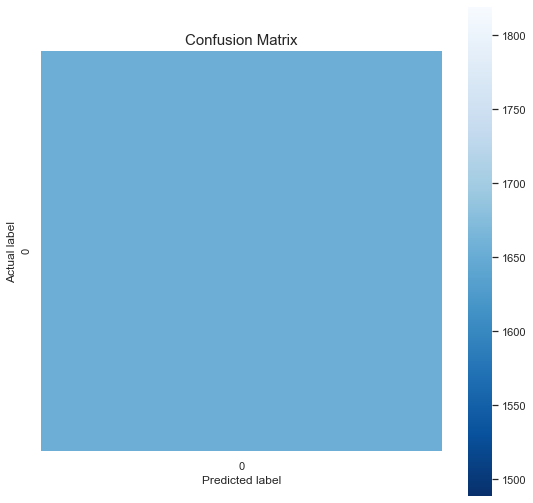

In [176]:
print('Confusion Matrix W.R.T label pred')

cm = confusion_matrix(y_normal.round(), Y_Preds, normalize=None)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=False, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix'
plt.title(all_sample_title, size = 15);

In [180]:
# Evaluating Overall Metrics - Accuracy, Precision, Recall, f1-Score on label data
Accuracy = accuracy_score(y_normal.round(), Y_Preds)
Precision = precision_score(y_normal.round(), Y_Preds, average= 'weighted')
Recall = recall_score(y_normal.round(), Y_Preds, average= 'weighted')
f1_Score = f1_score(y_normal.round(), Y_Preds, average= 'weighted')
print(f'Accuracy = {Accuracy:.3f}')
print(f'Precision = {Precision:.3f}')
print(f'Recall = {Recall:.3f}')
print(f'f1-Score = {f1_Score:.3f}')

Accuracy = 1.000
Precision = 1.000
Recall = 1.000
f1-Score = 1.000


In [177]:
print (classification_report(y_normal.round(), Y_Preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1654

    accuracy                           1.00      1654
   macro avg       1.00      1.00      1.00      1654
weighted avg       1.00      1.00      1.00      1654



In [178]:
## TPR, TNR, FPR, FNR

tn, fp, fn, tp = confusion_matrix(y_normal.round(), Y_Preds, labels=[0, 1]).ravel()
print('TNR:' ,tn, 'FPR : ', fp,'FNR : ', fn, "TPR : ", tp)

TNR: 1654 FPR :  0 FNR :  0 TPR :  0


In [179]:
ACC = (tp+tn)/(tp+tn+fp+fn)*100

print (ACC)

pd = (tp)/(tp+fn)*100

print(pd)

pfa = (fp)/(tn + fp)*100

print (pfa)

pmd = (fn)/(tp + fn)*100

print (pmd)

100.0
nan
0.0
nan


###  Prediction on DoS attacks

In [158]:
# Using Mean Absolute Error (MAE) in this case as a sample
Error = mean_absolute_error(y_valid, Predictions)
print(f"MAE of Dos : {Error}")

MAE of Dos : 0.9933494329452515


Confusion Matrix W.R.T Dos


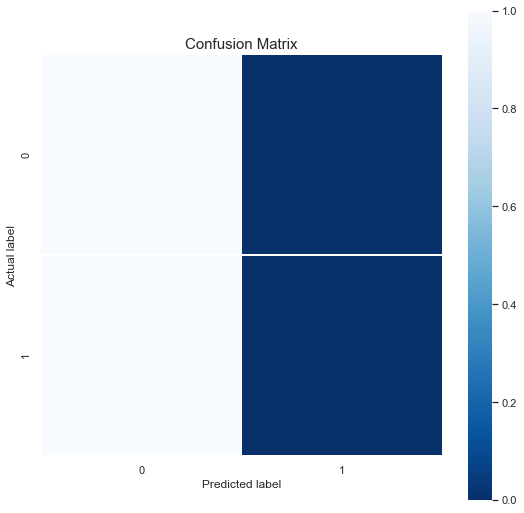

In [157]:
print('Confusion Matrix W.R.T Dos')


cm1 = confusion_matrix(y_valid.round(), Y_Preds, normalize='true')
plt.figure(figsize=(9,9))
sns.heatmap(cm1, annot=False, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix'

plt.title(all_sample_title, size = 15);

In [154]:
# Evaluating Overall Metrics - Accuracy, Precision, Recall, f1-Score of Dos predict
Accuracy = accuracy_score(y_valid.round(), Y_Preds)
Precision = precision_score(y_valid.round(), Y_Preds, average= 'weighted')
Recall = recall_score(y_valid.round(), Y_Preds, average= 'weighted')
f1_Score = f1_score(y_valid.round(), Y_Preds, average= 'weighted')
print(f'Accuracy = {Accuracy:.3f}')
print(f'Precision = {Precision:.3f}')
print(f'Recall = {Recall:.3f}')
print(f'f1-Score = {f1_Score:.3f}')

Accuracy = 0.993
Precision = 0.987
Recall = 0.993
f1-Score = 0.990


In [159]:
print (classification_report(y_valid.round(), Y_Preds))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1643
           1       0.00      0.00      0.00        11

    accuracy                           0.99      1654
   macro avg       0.50      0.50      0.50      1654
weighted avg       0.99      0.99      0.99      1654



In [160]:
## TPR, TNR, FPR, FNR

tn, fp, fn, tp = confusion_matrix(y_valid.round(), Y_Preds, labels=[0, 1]).ravel()
print('TNR:' ,tn, 'FPR : ', fp,'FNR : ', fn, "TPR : ", tp)

TNR: 1643 FPR :  0 FNR :  11 TPR :  0


In [161]:
ACC = (tp+tn)/(tp+tn+fp+fn)*100

print (ACC)

pd = (tp)/(tp+fn)*100

print(pd)

pfa = (fp)/(tn + fp)*100

print (pfa)

pmd = (fn)/(tp + fn)*100

print (pmd)

99.33494558645707
0.0
0.0
100.0
